In [48]:
# just here
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
# imports
from copy import copy
import numpy as np
import pandas as pd
import pynapple as nap
import matplotlib.pyplot as plt
import iblphotometry.loaders as loaders
import iblphotometry.plots as plots

In [50]:
# ONE instantiation
from one.api import ONE
one = ONE(base_url="https://alyx.internationalbrainlab.org", mode='remote')

In [73]:
# load data via data_loader
eids = one.search(dataset='photometry.signal.pqt')
eid = eids[2]

data_loader = loaders.PhotometryLoader(one)
raw_photometry = data_loader.load_photometry_data(eid, signal='GCaMP')
trials = data_loader.load_trials_table(eid)

(<Figure size 1400x800 with 4 Axes>,
 {'top': <Axes: label='top', title={'center': 'photometry signal'}, xlabel='time (s)', ylabel='photometry trace'>,
  'left': <Axes: label='left', xlabel='Frequency', ylabel='Power Spectral Density (dB/Hz)'>,
  'right': <Axes: label='right', title={'center': 'Cross-plot'}, xlabel='isosbestic signal', ylabel='calcium dependent signal'>})

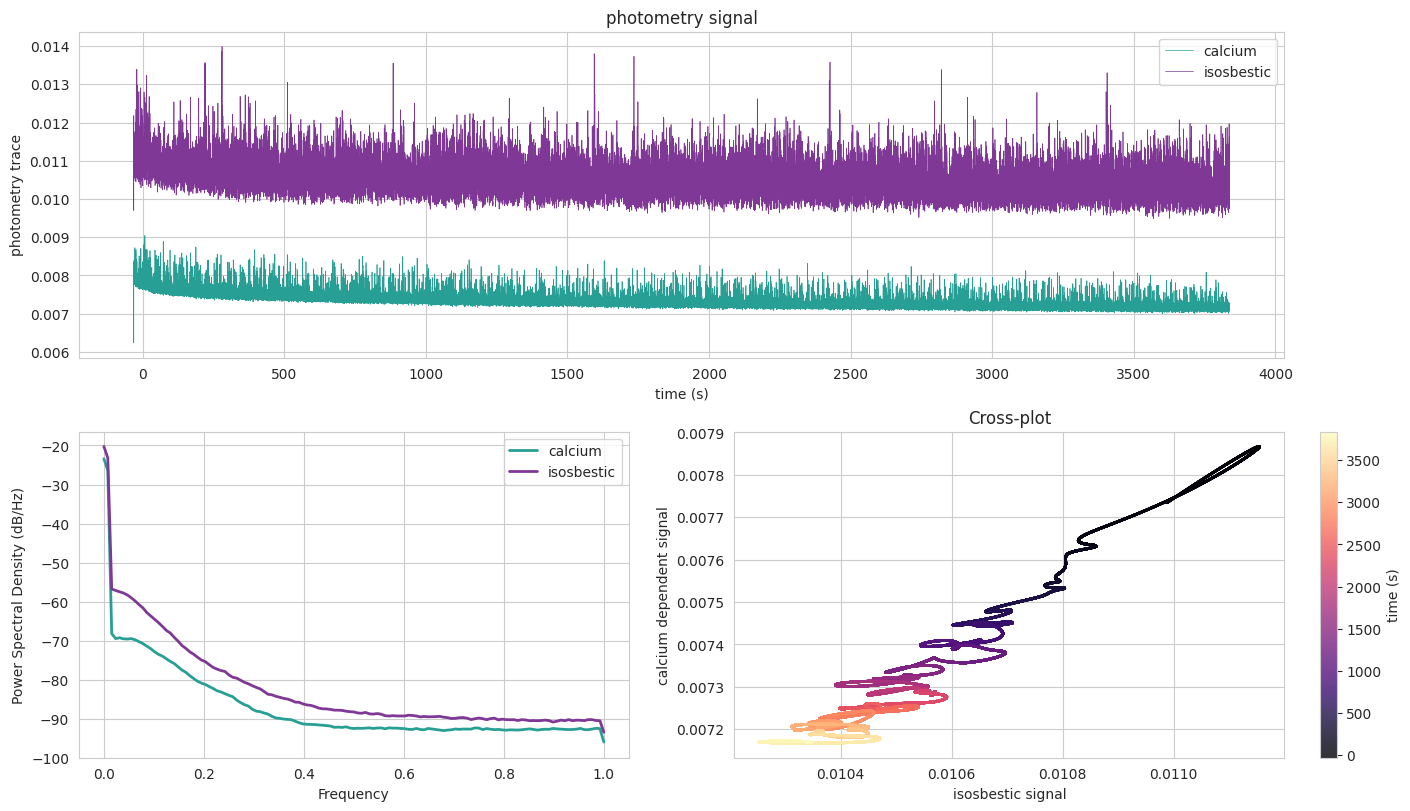

In [74]:
plots.plot_isosbestic_overview(raw_photometry['Region0G'], raw_photometry['Region1G'])

In [91]:
from iblphotometry.outlier_detection import remove_spikes
from iblphotometry.bleach_corrections import lowpass_bleachcorrect
from iblphotometry.sliding_operations import sliding_mad

lp_params = dict(N=3, Wn=0.01, btype='lowpass')
pipeline = [
      (remove_spikes, dict(sd=5)),
      (lowpass_bleachcorrect, dict(correction_method='subtract-divide', filter_params=lp_params)),
      (sliding_mad, dict(w_len=120,overlap=90)),
]
from iblphotometry.pipelines import run_pipeline

# run pipeline
photometry = run_pipeline(raw_photometry, pipeline)

<Axes: xlabel='time (s)', ylabel='signal (au)'>

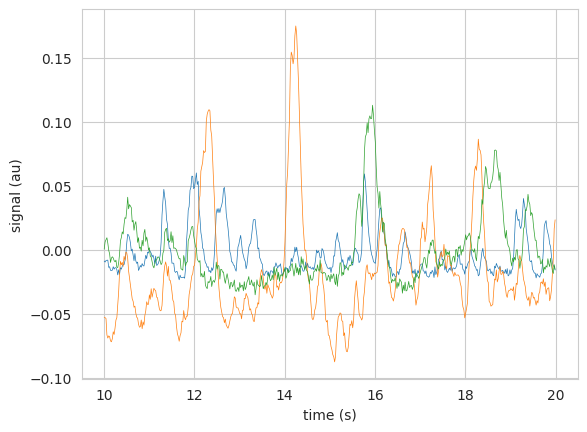

In [93]:
interval = nap.IntervalSet(start=10, end=20)
plots.plot_TsdFrame(photometry.restrict(interval))

In [ ]:
.